Concating files

In [1]:
import pandas as pd

In [3]:
df2019 = pd.read_csv("D:/ОМ/DATA ANALISYS/[WebFormySelf] Обработка и анализ данных на Python (2021)/videokurs/part4/12/12_files/names/yob2019.txt", names=['Name', 'Sex', 'Cnt'])
df2019

,Name,Sex,Cnt
0,Olivia,F,18451
1,Emma,F,17102
2,Ava,F,14440
3,Sophia,F,13714
4,Isabella,F,13306
...,...,...,...
31949,Zyheem,M,5
31950,Zykel,M,5
31951,Zyking,M,5
31952,Zyn,M,5


In [4]:
df2019.groupby('Sex').max()

,Name,Cnt
Sex,,
F,Zyva,18451
M,Zyrus,20502


In [5]:
df2019[df2019.Sex == 'M'].sort_values('Cnt', ascending=False).head(10)

,Name,Sex,Cnt
17905,Liam,M,20502
17906,Noah,M,19048
17907,Oliver,M,13891
17908,William,M,13542
17909,Elijah,M,13300
17910,James,M,13087
17911,Benjamin,M,12942
17912,Lucas,M,12412
17913,Mason,M,11408
17914,Ethan,M,11241


In [6]:
df2019[df2019.Sex == 'F'].sort_values('Cnt', ascending=False).head(10)

,Name,Sex,Cnt
0,Olivia,F,18451
1,Emma,F,17102
2,Ava,F,14440
3,Sophia,F,13714
4,Isabella,F,13306
5,Charlotte,F,13138
6,Amelia,F,12862
7,Mia,F,12414
8,Harper,F,10442
9,Evelyn,F,10392


In [8]:
df2019.sort_values('Cnt', ascending=False).drop_duplicates('Sex')

,Name,Sex,Cnt
17905,Liam,M,20502
0,Olivia,F,18451


Об'єднання файлів

In [11]:
result = pd.DataFrame()
for year in range(1880, 2020):
    tmp = pd.read_csv(f'D:/ОМ/DATA ANALISYS/[WebFormySelf] Обработка и анализ данных на Python (2021)/videokurs/part4/12/12_files/names/yob{year}.txt',names=['Name', 'Sex', 'Cnt'])
    tmp['Year'] = year
    result = pd.concat([result, tmp])

result
    

,Name,Sex,Cnt,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
31949,Zyheem,M,5,2019
31950,Zykel,M,5,2019
31951,Zyking,M,5,2019
31952,Zyn,M,5,2019


In [14]:
result.to_csv('result.csv', index=False)

Отримання всіх імен по рокам

Группування по двум стовпцям

1. All names from 1880 to 2019

In [16]:
df = pd.read_csv('result.csv')
df

,Name,Sex,Cnt,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1989396,Zyheem,M,5,2019
1989397,Zykel,M,5,2019
1989398,Zyking,M,5,2019
1989399,Zyn,M,5,2019


In [21]:
result = df.groupby(['Year', 'Sex']).sum()
result

Name      Cnt
Year Sex                                                            
1880 F    MaryAnnaEmmaElizabethMinnieMargaretIdaAliceBer...    90994
     M    JohnWilliamJamesCharlesGeorgeFrankJosephThomas...   110490
1881 F    MaryAnnaEmmaElizabethMargaretMinnieIdaAnnieBer...    91953
     M    JohnWilliamJamesGeorgeCharlesFrankJosephHenryT...   100743
1882 F    MaryAnnaEmmaElizabethMinnieMargaretIdaAliceBer...   107847
...                                                     ...      ...
2017 M    LiamNoahWilliamJamesLoganBenjaminMasonElijahJa...  1845472
2018 F    EmmaOliviaAvaIsabellaSophiaCharlotteMiaAmeliaH...  1694640
     M    LiamNoahWilliamJamesOliverBenjaminElijahLucasM...  1809166
2019 F    OliviaEmmaAvaSophiaIsabellaCharlotteAmeliaMiaH...  1665373
     M    LiamNoahOliverWilliamElijahJamesBenjaminLucasM...  1779948

[280 rows x 2 columns]

In [22]:
result.index

MultiIndex([(1880, 'F'),
            (1880, 'M'),
            (1881, 'F'),
            (1881, 'M'),
            (1882, 'F'),
            (1882, 'M'),
            (1883, 'F'),
            (1883, 'M'),
            (1884, 'F'),
            (1884, 'M'),
            ...
            (2015, 'F'),
            (2015, 'M'),
            (2016, 'F'),
            (2016, 'M'),
            (2017, 'F'),
            (2017, 'M'),
            (2018, 'F'),
            (2018, 'M'),
            (2019, 'F'),
            (2019, 'M')],
           names=['Year', 'Sex'], length=280)

In [31]:
result.index.get_level_values(0)

Index([1880, 1880, 1881, 1881, 1882, 1882, 1883, 1883, 1884, 1884,
       ...
       2015, 2015, 2016, 2016, 2017, 2017, 2018, 2018, 2019, 2019],
      dtype='int64', name='Year', length=280)

In [32]:
result.index.get_level_values(1)

Index(['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M',
       ...
       'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'],
      dtype='object', name='Sex', length=280)

In [30]:
result.loc[result.index.get_level_values(1)=='F']

,,Name,Cnt
Year,Sex,,
1880,F,MaryAnnaEmmaElizabethMinnieMargaretIdaAliceBer...,90994
1881,F,MaryAnnaEmmaElizabethMargaretMinnieIdaAnnieBer...,91953
1882,F,MaryAnnaEmmaElizabethMinnieMargaretIdaAliceBer...,107847
1883,F,MaryAnnaEmmaElizabethMinnieMargaretBerthaIdaAn...,112319
1884,F,MaryAnnaEmmaElizabethMinnieMargaretIdaClaraBer...,129019
...,...,...,...
2015,F,EmmaOliviaSophiaAvaIsabellaMiaAbigailEmilyChar...,1781725
2016,F,EmmaOliviaAvaSophiaIsabellaMiaCharlotteAbigail...,1767902
2017,F,EmmaOliviaAvaIsabellaSophiaMiaCharlotteAmeliaE...,1721550


In [34]:
result.loc[result.index.get_level_values(0)== 1880]

Name     Cnt
Year Sex                                                           
1880 F    MaryAnnaEmmaElizabethMinnieMargaretIdaAliceBer...   90994
     M    JohnWilliamJamesCharlesGeorgeFrankJosephThomas...  110490

In [35]:
result.loc[result.index.get_level_values(0).isin([1880, 2019])]

Name      Cnt
Year Sex                                                            
1880 F    MaryAnnaEmmaElizabethMinnieMargaretIdaAliceBer...    90994
     M    JohnWilliamJamesCharlesGeorgeFrankJosephThomas...   110490
2019 F    OliviaEmmaAvaSophiaIsabellaCharlotteAmeliaMiaH...  1665373
     M    LiamNoahOliverWilliamElijahJamesBenjaminLucasM...  1779948

In [37]:
result.loc[result.index.get_level_values(0).isin(range(1880, 1885))]

Name     Cnt
Year Sex                                                           
1880 F    MaryAnnaEmmaElizabethMinnieMargaretIdaAliceBer...   90994
     M    JohnWilliamJamesCharlesGeorgeFrankJosephThomas...  110490
1881 F    MaryAnnaEmmaElizabethMargaretMinnieIdaAnnieBer...   91953
     M    JohnWilliamJamesGeorgeCharlesFrankJosephHenryT...  100743
1882 F    MaryAnnaEmmaElizabethMinnieMargaretIdaAliceBer...  107847
     M    JohnWilliamJamesGeorgeCharlesFrankJosephThomas...  113686
1883 F    MaryAnnaEmmaElizabethMinnieMargaretBerthaIdaAn...  112319
     M    JohnWilliamJamesCharlesGeorgeFrankJosephHenryR...  104625
1884 F    MaryAnnaEmmaElizabethMinnieMargaretIdaClaraBer...  129019
     M    JohnWilliamJamesGeorgeCharlesFrankJosephThomas...  114442

In [38]:
result.loc[(result.index.get_level_values(0).isin(range(1880, 1885))) & (result.index.get_level_values(1)=='F')]

,,Name,Cnt
Year,Sex,,
1880,F,MaryAnnaEmmaElizabethMinnieMargaretIdaAliceBer...,90994
1881,F,MaryAnnaEmmaElizabethMargaretMinnieIdaAnnieBer...,91953
1882,F,MaryAnnaEmmaElizabethMinnieMargaretIdaAliceBer...,107847
1883,F,MaryAnnaEmmaElizabethMinnieMargaretBerthaIdaAn...,112319
1884,F,MaryAnnaEmmaElizabethMinnieMargaretIdaClaraBer...,129019


Перевод индекса в столбец с помощью метода unstack

In [40]:
result2 = result.unstack('Sex')
result2

Name  \
Sex                                                   F   
Year                                                      
1880  MaryAnnaEmmaElizabethMinnieMargaretIdaAliceBer...   
1881  MaryAnnaEmmaElizabethMargaretMinnieIdaAnnieBer...   
1882  MaryAnnaEmmaElizabethMinnieMargaretIdaAliceBer...   
1883  MaryAnnaEmmaElizabethMinnieMargaretBerthaIdaAn...   
1884  MaryAnnaEmmaElizabethMinnieMargaretIdaClaraBer...   
...                                                 ...   
2015  EmmaOliviaSophiaAvaIsabellaMiaAbigailEmilyChar...   
2016  EmmaOliviaAvaSophiaIsabellaMiaCharlotteAbigail...   
2017  EmmaOliviaAvaIsabellaSophiaMiaCharlotteAmeliaE...   
2018  EmmaOliviaAvaIsabellaSophiaCharlotteMiaAmeliaH...   
2019  OliviaEmmaAvaSophiaIsabellaCharlotteAmeliaMiaH...   

                                                             Cnt           
Sex                                                   M        F        M  
Year                                                                       
1880  JohnWilliamJamesCharlesGeorgeFrankJosephThomas...    90994   110490  
1881  JohnWilliamJamesGeorgeCharlesFrankJosephHenryT...    91953   100743  
1882  JohnWilliamJamesGeorgeCharlesFrankJosephThomas...   107847   113686  
1883  JohnWilliamJamesCharlesGeorgeFrankJosephHenryR...   112319   104625  
1884  JohnWilliamJamesGeorgeCharlesFrankJosephThomas...   129019   114442  
...                                                 ...      ...      ...  
2015  NoahLiamMasonJacobWilliamEthanJamesAlexanderMi...  1781725  1913059  
2016  NoahLiamWilliamMasonJamesBenjaminJacobMichaelE...  1767902  1893471  
2017  LiamNoahWilliamJamesLoganBenjaminMasonElijahJa...  1721550  1845472  
2018  LiamNoahWilliamJamesOliverBenjaminElijahLucasM...  1694640  1809166  
2019  LiamNoahOliverWilliamElijahJamesBenjaminLucasM...  1665373  1779948  

[140 rows x 4 columns]

In [41]:
result2.loc[1880]

      Sex
Name  F      MaryAnnaEmmaElizabethMinnieMargaretIdaAliceBer...
      M      JohnWilliamJamesCharlesGeorgeFrankJosephThomas...
Cnt   F                                                  90994
      M                                                 110490
Name: 1880, dtype: object

In [42]:
result2.loc[1882].Cnt.M

np.int64(113686)

In [43]:
result2.Cnt

Sex,F,M
Year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2015,1781725,1913059
2016,1767902,1893471
2017,1721550,1845472


<Axes: xlabel='Year'>

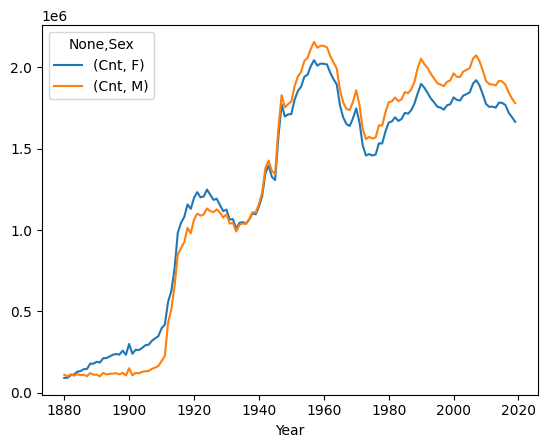

In [44]:
result2.plot()

In [45]:
import matplotlib.pyplot as plt

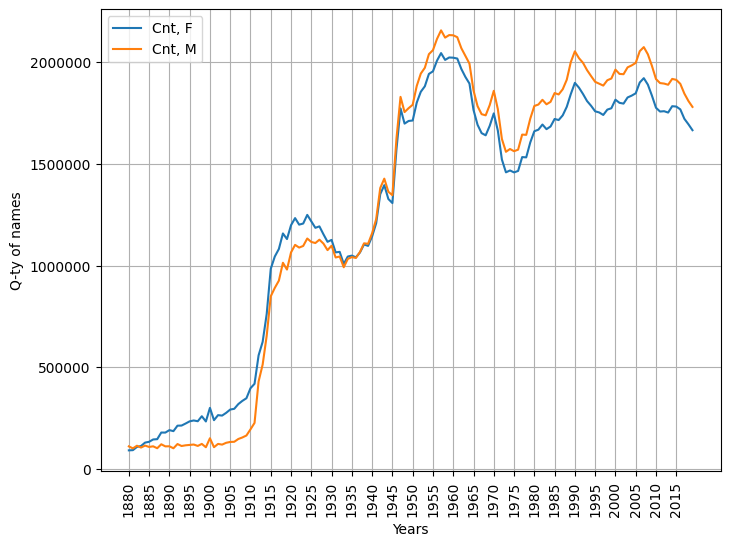

In [52]:
plt.figure(figsize=(8, 6))
plt.plot(result2.index, result2.Cnt)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xticks(range(1880, result2.index.max() + 1, 5), rotation='vertical')
# plt.yticks(range(0, int(round(result2.max()[0])), 500000))

plt.xlabel('Years')
plt.ylabel('Q-ty of names')

# for index, value in enumerate(result2.Total):
#     plt.text(
#         index,
#         500000,
#         '{0:, }'.format(round(value)).replace(',', ' '),
#         rotation='vertical',
#         size='15',
#         color='#0000',
#         ha='center'
#     )
plt.grid()
plt.legend(['Cnt, F', 'Cnt, M'])
plt.show()

Определяем топ 10 имен

In [56]:
df_fem = df[df.Sex == 'F']\
.sort_values('Cnt', ascending=False).drop_duplicates(subset='Name').head(10)
df_fem

,Name,Sex,Cnt,Year
431067,Linda,F,99690,1947
180208,Mary,F,73985,1921
726774,Jennifer,F,63602,1972
633502,Lisa,F,60269,1965
472256,Patricia,F,56442,1951
1002208,Jessica,F,55992,1987
1002209,Ashley,F,54853,1987
504201,Deborah,F,54683,1954
515183,Debra,F,50563,1955
431070,Barbara,F,48793,1947


In [57]:
df_men = df[df.Sex == 'M']\
.sort_values('Cnt', ascending=False).drop_duplicates(subset='Name').head(10)
df_men

,Name,Sex,Cnt,Year
437170,James,M,94766,1947
544655,Michael,M,92726,1957
437171,Robert,M,91645,1947
437172,John,M,88320,1947
521907,David,M,86285,1955
437173,William,M,66989,1947
954132,Christopher,M,60026,1984
427051,Richard,M,58876,1946
579839,Mark,M,58733,1960
819789,Jason,M,55653,1977


In [58]:
df_men2 = df[df.Sex == 'M']\
.sort_values('Cnt', ascending=False).drop_duplicates(subset='Name').drop_duplicates(subset='Year').head(10)
df_men2

,Name,Sex,Cnt,Year
437170,James,M,94766,1947
544655,Michael,M,92726,1957
521907,David,M,86285,1955
954132,Christopher,M,60026,1984
427051,Richard,M,58876,1946
579839,Mark,M,58733,1960
819789,Jason,M,55653,1977
934618,Matthew,M,50220,1983
489113,Thomas,M,48642,1952
1060536,Joshua,M,44092,1989


In [60]:
df_all = pd.concat([df_fem, df_men])
df_all

,Name,Sex,Cnt,Year
431067,Linda,F,99690,1947
180208,Mary,F,73985,1921
726774,Jennifer,F,63602,1972
633502,Lisa,F,60269,1965
472256,Patricia,F,56442,1951
1002208,Jessica,F,55992,1987
1002209,Ashley,F,54853,1987
504201,Deborah,F,54683,1954
515183,Debra,F,50563,1955
431070,Barbara,F,48793,1947
